In [3]:
import pandas as pd

data = {
    "Tanggal" : ["2025-03-06", "2025-03-06", "2025-03-06", "2025-03-07", "2025-03-08", "2025-03-09", "2025-03-04", "2025-03-10", "2025-03-11", "2025-03-11"],
    "Produk" : ["Minyak Goreng", "Beras", "Gula", "Tepung", "Mie Instan", "Susu", "Telur", "Garam", "Mentega", "Baking Soda"],
    "Jumlah Terjual" : [15, 10, 15, 10, 15, 2, 20, 6, 7, 9],
    "Stok" : [30, 20, 20, 15, 35, 20, 30, 10, 12, 14],
    "Harga Satuan" : [17000, 15000, 11000, 12000, 4000, 16000, 23000, 8000, 19000, 5000],
}

df = pd.DataFrame(data)

df.to_csv("data_penjualan_latihan.csv", index=False)

print("File csv berhasil dibuat dan disimpan sebagai 'data_penjualan_latihan'!")

File csv berhasil dibuat dan disimpan sebagai 'data_penjualan_latihan'!


In [4]:
df = pd.read_csv("data_penjualan_latihan.csv")

print(df.head())

      Tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan
0  2025-03-06  Minyak Goreng              15    30         17000
1  2025-03-06          Beras              10    20         15000
2  2025-03-06           Gula              15    20         11000
3  2025-03-07         Tepung              10    15         12000
4  2025-03-08     Mie Instan              15    35          4000


In [5]:
print(df.isnull().sum())

df["Tanggal"] = pd.to_datetime(df["Tanggal"])

df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]

df["Keuntungan"] = df["Total Penjualan"] - (df["Jumlah Terjual"] * 10000)

print(df.head())

Tanggal           0
Produk            0
Jumlah Terjual    0
Stok              0
Harga Satuan      0
dtype: int64
     Tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan  \
0 2025-03-06  Minyak Goreng              15    30         17000   
1 2025-03-06          Beras              10    20         15000   
2 2025-03-06           Gula              15    20         11000   
3 2025-03-07         Tepung              10    15         12000   
4 2025-03-08     Mie Instan              15    35          4000   

   Total Penjualan  Keuntungan  
0           255000      105000  
1           150000       50000  
2           165000       15000  
3           120000       20000  
4            60000      -90000  


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df[["Jumlah Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Akurasi Model :", accuracy_score(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

Akurasi Model : 1.0
Akurasi model: 1.0


In [7]:
produk_baru = [[8, 3]]
prediksi = model.predict(produk_baru)

if prediksi[0] == 1:
  print("Produk perlu di restok!")
else :
  print("Stok masih cukup.")

Stok masih cukup.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


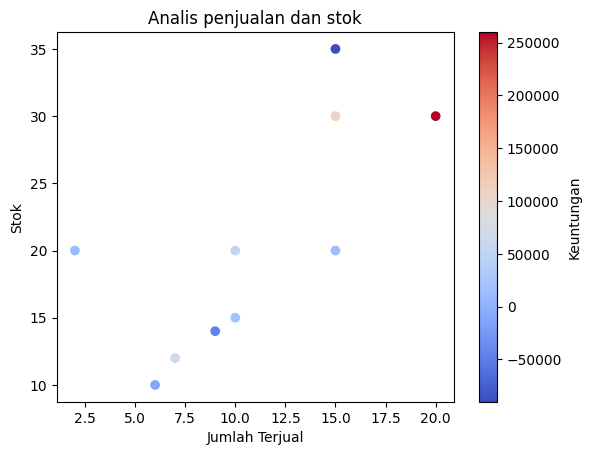

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analis penjualan dan stok")
plt.colorbar(label="Keuntungan")
plt.show()